# 第8章 数値シミュレーションで消費者行動を予測する10本ノック

In [1]:
# 下準備として，データのあるディレクトリに移動しておく
import os

DATA_ROOT_DIR = "./sample/8章/"
os.chdir(DATA_ROOT_DIR)

from PIL import Image

def load_img(img_name):
    try:
        img = Image.open(img_name)
    except:
        img = None
    return img

def save_and_show(plt, img_name):
    plt.tight_layout()
    plt.savefig(img_name)
    plt.show()

## ノック71 人間関係のネットワークを可視化してみよう
まずは可視化を行う．

In [2]:
import pandas as pd

df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


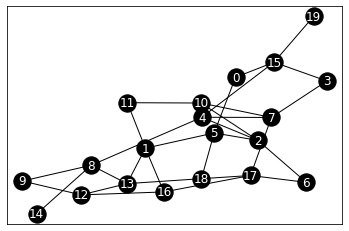

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# 頂点
NUM = len(df_links.index)
for i in range(1,NUM+1):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

# 辺
for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
        
# 描画 
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.show()

## ノック72 口コミによる情報伝播の様子を可視化してみよう
時系列上の情報伝播を可視化する

In [4]:
import numpy as np
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [5]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

# アクティブノード可視化
def active_node_coloring(list_active):
    # print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    # print(len(list_color))
    return list_color

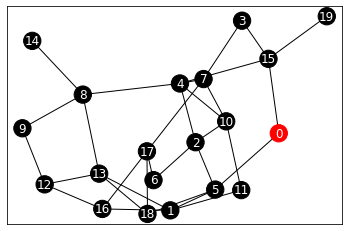

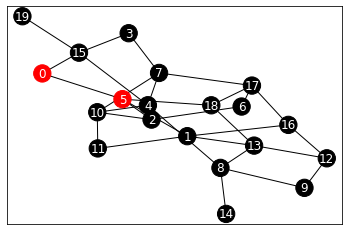

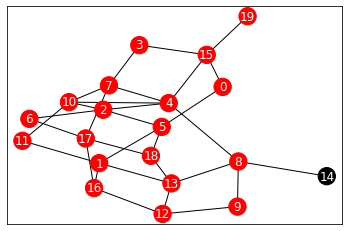

In [6]:
# 描画
plt.figure()
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

plt.figure()
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

plt.figure()
t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

## ノック73 口コミ数の時系列変化をグラフ化してみよう
次は，時系列変化のグラフ化による可視化を行う

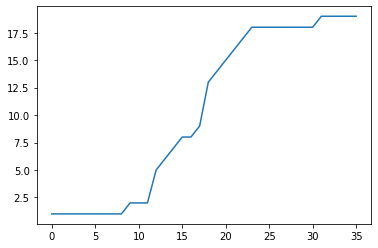

In [7]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## ノック74 会員数の時系列変化をシミュレーションしてみよう
拡散率と減少率をを変化させ，会員数の時系列変化をシミュレーションする．

In [8]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence,df_links):
    # 拡散 #
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    # 消滅 #
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

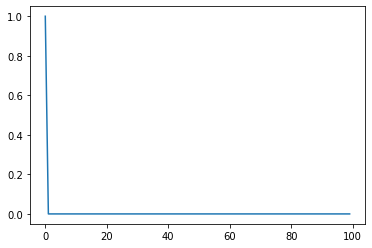

In [9]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())


list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

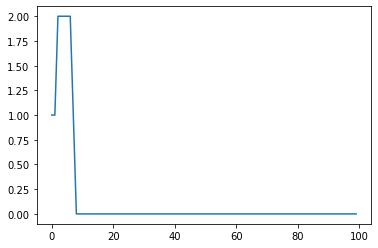

In [10]:
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.show()

## ノック75 パラメータの全体像を相図を見ながら把握しよう
パラメータとシミュレーション結果を図にして把握する．


In [11]:
# シミュレーション
from tqdm import tqdm

T_NUM = 100
NUM_PhaseDiagram = 20


# 時間がかかるので保存しているものを読み出す．
npy_path = "../../output/8/phaseDiagram_{:0=2}.npy".format(NUM_PhaseDiagram)
try:
    phaseDiagram = np.load(npy_path)
except:
    phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
    for i_p in tqdm(range(NUM_PhaseDiagram)):
        for i_d in range(NUM_PhaseDiagram):
            percent_percolation = 0.05*i_p
            percent_disapparence = 0.05*i_d
            list_active = np.zeros(NUM)
            list_active[0] = 1
            for t in range(T_NUM):
                list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
            phaseDiagram[i_p][i_d] = sum(list_active)
    np.save(npy_path, phaseDiagram)

print()
print(phaseDiagram)


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 14.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 16.  0. 13.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 12. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 18.  0. 11. 10.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 15. 12. 17. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0. 16. 14. 14. 10. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 18. 15. 16. 14. 13. 13.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 19. 12. 13. 16. 14.  9. 11.  8.  6.  0.  0.  0.  0.  0

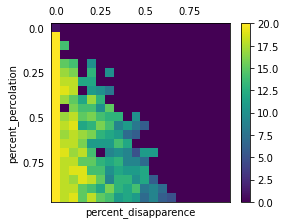

In [12]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)

## ノック76 実データを読み込んでみよう
読み込んでいく

In [13]:
import pandas as pd

df_mem_links = pd.read_csv("links_members.csv")
df_mem_info = pd.read_csv("info_members.csv")
print(df_mem_links.head())
print(df_mem_info.head())

  Unnamed: 0  Node0  Node1  Node2  Node3  Node4  Node5  Node6  Node7  Node8  \
0      Node0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      Node1    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0   
2      Node2    1.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
3      Node3    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
4      Node4    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

   ...  Node530  Node531  Node532  Node533  Node534  Node535  Node536  \
0  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1  ...      0.0      1.0      1.0      0.0      0.0      0.0      0.0   
2  ...      0.0      0.0      1.0      0.0      1.0      0.0      0.0   
3  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  ...      0.0      0.0      0.0      1.0      1.0      0.0      0.0   

   Node537  Node538  Node539  
0      0.0      0.0      0.0  
1      0.0      0.0     

## ノック77 リンク数の分布を可視化しよう
各ノードのリンク数を可視化する．

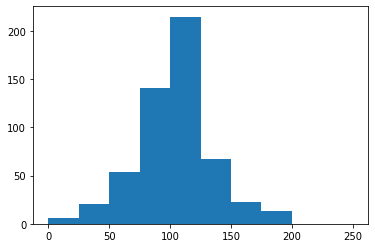

In [14]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])
    
plt.hist(array_linkNum, bins=10,range=(0,250))
plt.show()